## Compare performance of OQ_fireopal vs default IBMQ compilation on IBM QPUs

In [1]:
from openqaoa.problems import MaximumCut
from openqaoa.backends import create_device
from openqaoa import QAOA
import networkx as nx
from qiskit.tools.visualization import plot_histogram
from openqaoa.utilities import random_k_regular_graph, plot_graph

In [ ]:
#ibm device name used for this experiment
device_name = "ibm_nairobi"

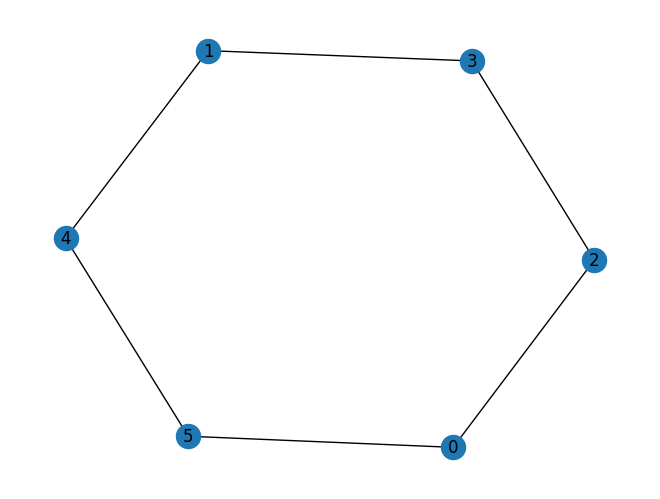

In [2]:
ring = random_k_regular_graph(degree=2,nodes=[0,1,2,3,4,5],seed=234345)
prob = MaximumCut(ring)
qubo = prob.qubo
nx.draw(ring, with_labels=True)

In [3]:
from openqaoa.utilities import ground_state_hamiltonian
ground_state_hamiltonian(qubo.hamiltonian)

(-6.0, ['010110', '101001'])

### Optimize with default IBMQ compilation

In [ ]:
qpu_credentials ={
    "hub": "ibm-q-startup",
    "group": "entropica-labs", 
    "project": "reservations"
}
ibm_device = create_device(location='ibmq', name=device_name, **qpu_credentials)

In [ ]:
q_default = QAOA()
q_default.set_header(project_id = "2d95185f-edea-49f8-8b04-ec763a55b1c7",
                    description = "Fireopal - running with default IBM",
                    provider = 'ibmq',
                    target = 'ibm_nairobi',
                    cloud = 'ibmq',
                    run_by = 'vishal')

In [10]:
q_default.set_device(ibm_device)
q_default.set_circuit_properties(param_type="standard",init_type="ramp")
q_default.set_backend_properties(n_shots=5000)
q_default.set_classical_optimizer(maxiter=19, method='COBYLA')
q_default.compile(qubo)

In [11]:
q_default.optimize()

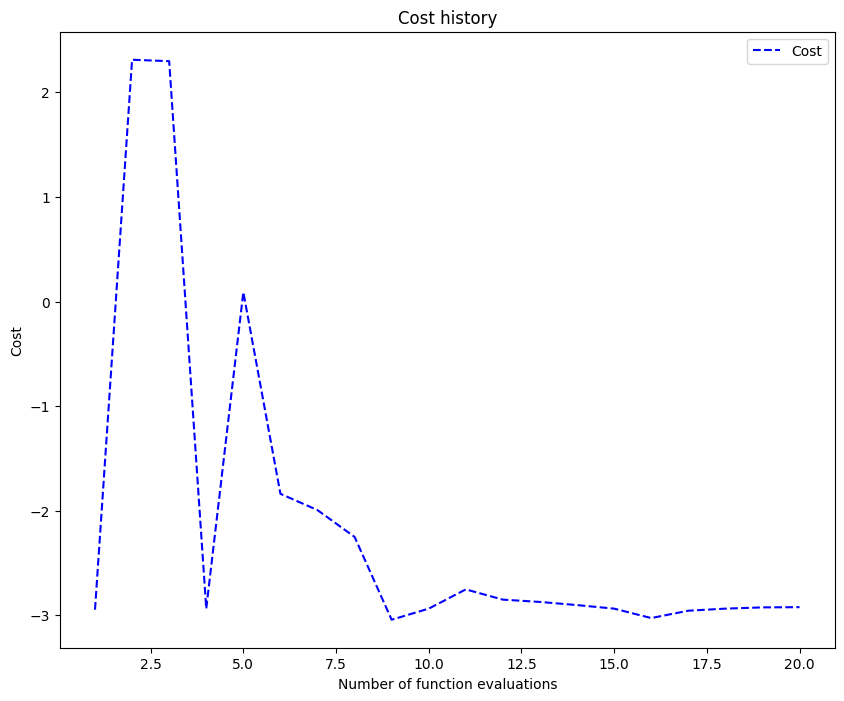

In [12]:
q_default.result.plot_cost()

In [ ]:
q_default.dump(file_path="oq_fireopal_run_data/ibm_default/", prepend_id=True)

### Optimize with FireOpal compilation

In [15]:
fire_device = create_device('qctrl',
                    name=device_name,
                    hub='ibm-q-startup',
                    group='entropica-labs',
                    project='reservations')

In [ ]:
q_fireopal.set_header(project_id = "2d95185f-edea-49f8-8b04-ec763a55b1c7",
                        description = "Fireopal - running with FireOpal compilation",
                        provider = 'ibmq',
                        target = 'ibm_nairobi',
                        cloud = 'ibmq',
                        run_by = 'vishal')

In [19]:
q_fireopal.set_device(fire_device)
q_fireopal.set_circuit_properties(param_type="standard",init_type="ramp")
q_fireopal.set_backend_properties(n_shots=5000)
q_fireopal.set_classical_optimizer(method="COBYLA", maxiter=19)

In [20]:
q_fireopal.compile(qubo)

## Experiment running OpenQAOA computations using FireOpal on IBMQ

In [ ]:
q_fireopal.optimize()

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Traceback (most recent call last):
  File "/Users/vishal/opt/anaconda3/envs/oq_clone_apr23/lib/python3.10/site-packages/scipy/optimize/_cobyla_py.py", line 258, in calcfc
    f = fun(np.copy(x), *args)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-core/optimizers/training_vqa.py", line 234, in optimize_this
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    callback_cost = self.vqa.expectation(self.variational_params, **n_shots_dict)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-core/utilities.py", line 252, in wrapper
    values = function(*args, **kwargs)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-core/backends/basebackend.py", line 284, in expectation
    counts = self.get_counts(params, n_shots)
  File "/Users/vishal/Documents/Github/openqaoa/src/openqaoa-fireopal/bac

In [1]:
q_fireopal.dump(file_path="oq_fireopal_run_data/fireopal_compilation/", prepend_id=True)

NameError: name 'q' is not defined

### Finally using FireOpal's `solve_qaoa` method

In [ ]:
fire_result = fireopal.solve_qaoa(prob.G, "maxcut", fire_device.credentials, fire_device.device_name)